In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Asus\\Desktop\\SLIIT - CodeFest 2024 - AI SPRINT\\Practice\\monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

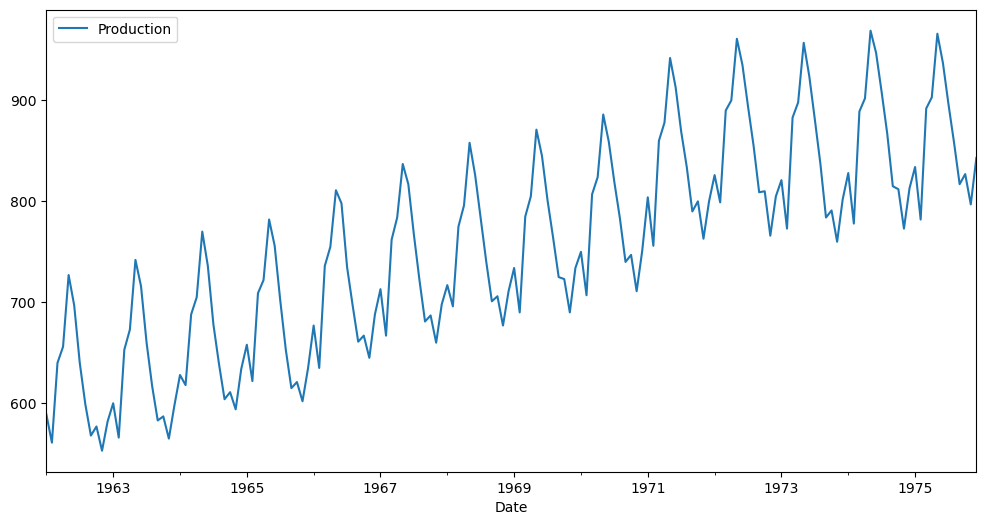

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

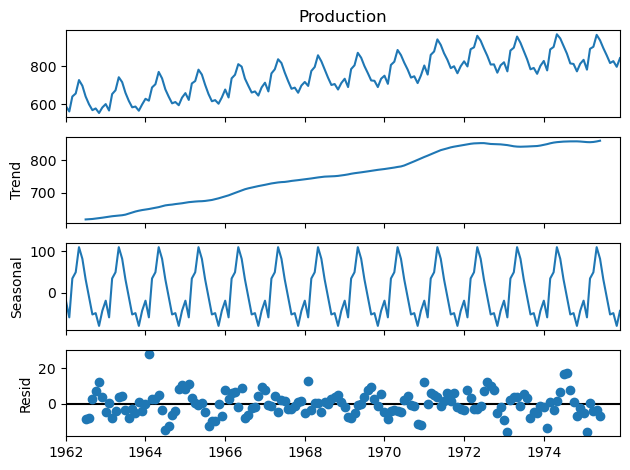

In [6]:
results = seasonal_decompose(df['Production'])
results.plot();

In [7]:
len(df)

168

In [8]:
train = df.iloc[:156]
test = df.iloc[156:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [11]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [14]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [15]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [16]:
X.shape

(1, 3, 1)

In [17]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Define model with Input layer
model = Sequential([
    Input(shape=(n_input, n_features)),
    LSTM(100, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
 29/144 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1412

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0806
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0216
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0056
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0059
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0045
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034


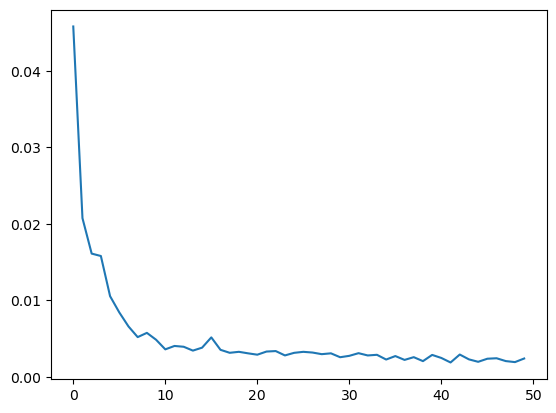

In [22]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [23]:
last_train_batch = scaled_train[-12:]

In [24]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [25]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


array([[0.6438435]], dtype=float32)

In [26]:
scaled_test[0]

array([0.67548077])

In [27]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [28]:
test_predictions

[array([0.6438435], dtype=float32),
 array([0.6229407], dtype=float32),
 array([0.8108889], dtype=float32),
 array([0.88495374], dtype=float32),
 array([1.0076423], dtype=float32),
 array([0.98401725], dtype=float32),
 array([0.9045905], dtype=float32),
 array([0.79353875], dtype=float32),
 array([0.6776743], dtype=float32),
 array([0.6346144], dtype=float32),
 array([0.5814039], dtype=float32),
 array([0.62635845], dtype=float32)]

In [29]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [30]:
true_predictions = scaler.inverse_transform(test_predictions)

In [31]:
test['Predictions'] = true_predictions

C:\Users\Asus\AppData\Local\Temp\ipykernel_19400\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

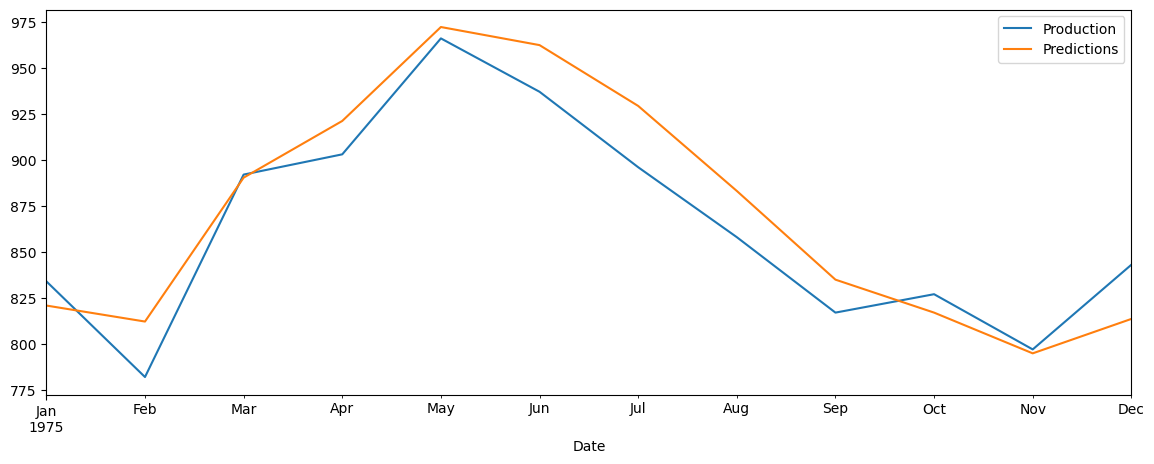

In [32]:
test.plot(figsize=(14,5))

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

20.669157140529347


In [34]:
# Save in HDF5 format
model.save("rnn_model.h5", save_format='h5')

# Load HDF5 model
from tensorflow.keras.models import load_model
model = load_model("rnn_model.h5", compile=False)
model.compile(optimizer='adam', loss='mse')  # Recompile with your original settings

In [ ]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

# Define sequence length
SEQUENCE_LENGTH = 12

# Initialize with last 12 values from scaled_train
last_sequence = scaled_train[-SEQUENCE_LENGTH:].flatten()
predictions = []

@app.route('/predict', methods=['POST'])
def predict():
    global last_sequence, predictions
    try:
        # Reshape for model input (1, 12, 1)
        input_array = last_sequence.reshape(1, SEQUENCE_LENGTH, 1)
        
        # Get prediction
        prediction = model.predict(input_array)
        
        # Convert prediction back to original scale
        prediction_reshaped = prediction.reshape(-1, 1)
        real_prediction = scaler.inverse_transform(prediction_reshaped)
        
        predictions.append(real_prediction[0][0])
        
        # Update sequence by removing first value and adding the new prediction
        last_sequence = np.append(last_sequence[1:], prediction[0][0])
        
        return jsonify({
            'day': len(predictions),
            'prediction': float(real_prediction[0][0]),
            'current_sequence': last_sequence.tolist()
        })
    
    except Exception as e:
        return jsonify({
            'error': str(e),
            'sequence_shape': last_sequence.shape
        }), 400

if __name__ == '__main__':
    app.run(debug=False, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:25:50] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:25:52] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:25:54] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:25:58] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:25:59] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:01] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:02] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:03] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:04] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:06] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:07] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:08] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:09] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:11] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:12] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:13] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:14] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:15] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:17] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:18] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:19] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:20] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:22] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:23] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:24] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:25] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:27] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:28] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:29] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:31] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 10:26:32] "POST /predict HTTP/1.1" 200 -
